# Facial Emotion Recognition Data Creation

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import os
import shutil
import math 

from sklearn.utils import resample
from keras.utils import load_img

## FER Full Data

In [2]:
train = "data/fer_data/full_data/train"
test = "data/fer_data/full_data/test"

## EDA

In [3]:
print("Train Set folders contains:\n")

train_count = []

for folder in os.listdir(train) :
    print("   ", folder, "=", len(os.listdir(train +  "/" + folder)), "images")
    train_count.append(len(os.listdir(train +  "/" + folder)))
    
print("\nTotal images in the train set = ", sum(train_count), "images")

Train Set folders contains:

    angry = 3995 images
    disgust = 436 images
    fear = 4097 images
    happy = 7215 images
    neutral = 4965 images
    sad = 4830 images
    surprise = 3171 images

Total images in the train set =  28709 images


In [4]:
print("Test Set folders contains:\n")

test_count = []

for folder in os.listdir(test) :
    print("   ", folder, "=", len(os.listdir(test +  "/" + folder)), "images")
    test_count.append(len(os.listdir(test +  "/" + folder)))
    
print("\nTotal images in the test set = ", sum(test_count), "images")

Test Set folders contains:

    angry = 958 images
    disgust = 111 images
    fear = 1024 images
    happy = 1774 images
    neutral = 1233 images
    sad = 1247 images
    surprise = 831 images

Total images in the test set =  7178 images


In [5]:
total = train_count + test_count
print("Total images of the dataset = ", sum(total), "images")

Total images of the dataset =  35887 images


## Viz

Train Images:


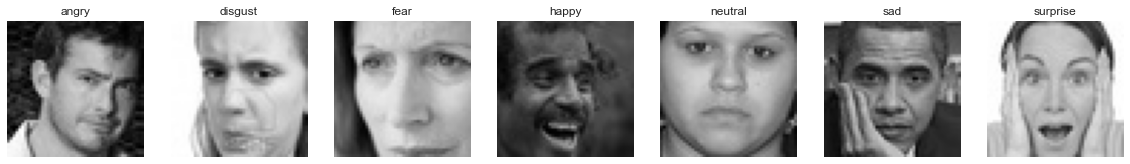

In [6]:
print('Train Images:')
plt.figure(figsize=(20,20))

i = 1
for folder in os.listdir(train):
    
    img = load_img((train + "/" + folder +'/'+ os.listdir(train + "/" + folder)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')
    i += 1

plt.show()

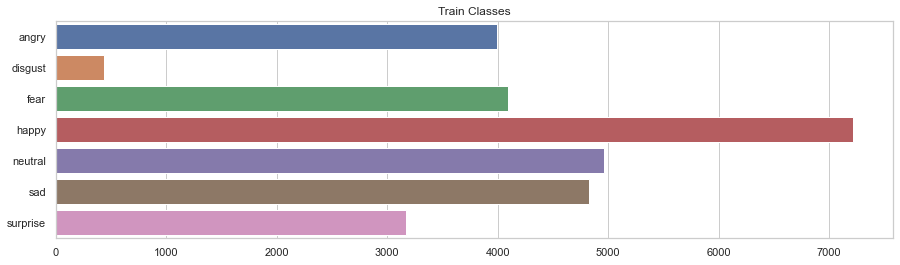

In [7]:
plt.figure(figsize=(15,4))

ax = sns.barplot(y=os.listdir(train), x=train_count)

plt.title('Train Classes')

plt.show()

Test Images:


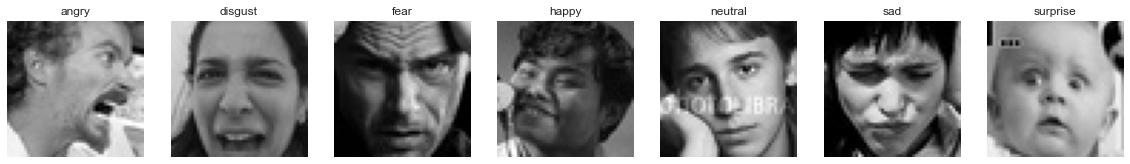

In [8]:
print('Test Images:')
plt.figure(figsize=(20,20))

i = 1
for folder in os.listdir(test):
    
    img = load_img((test + "/" + folder +'/'+ os.listdir(test + "/" + folder)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')
    i += 1

plt.show()

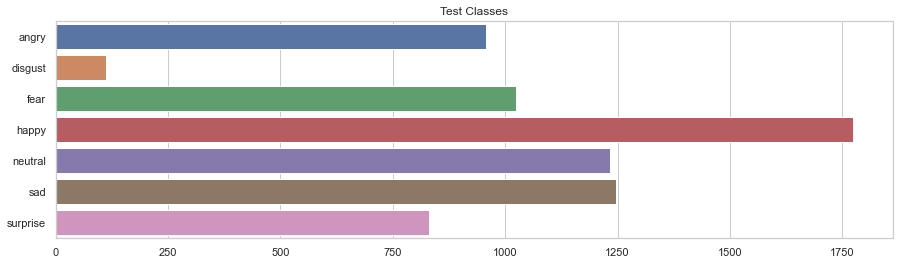

In [9]:
plt.figure(figsize=(15,4))

ax = sns.barplot(y=os.listdir(test), x=test_count)

plt.title('Test Classes')

plt.show()

`Majority classes belongs to Happy and Sad`
`Intersted in these two classes only`

## Pre-process

## Extracting only required data

In [10]:
interested_emotions = ['happy', 'sad']

In [11]:
def new_data(directory, folders, name):
    
    for folder in folders:
        
        folder_path = directory + "/" + folder
        
        source_dir = directory + "/" + folder

        destination_dir = "data/fer_data/new_data/" + name + "/" + folder

        shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
    
        print("Data created at", destination_dir)

In [12]:
new_data(train, interested_emotions, 'new_train')

Data created at fer_data/new_data/new_train/happy
Data created at fer_data/new_data/new_train/sad


In [13]:
new_data(test, interested_emotions, 'new_test')

Data created at fer_data/new_data/new_test/happy
Data created at fer_data/new_data/new_test/sad


## Analyzing new data

In [14]:
new_train = "data/fer_data/new_data/new_train"
new_test = "data/fer_data/new_data/new_test"

In [15]:
print("New Train Set folders contains:\n")

new_train_count = []

for folder in os.listdir(new_train) :
    print("   ", folder, "=", len(os.listdir(new_train +  "/" + folder)), "images")
    new_train_count.append(len(os.listdir(new_train +  "/" + folder)))
    
print("\nTotal images in the new train set = ", sum(new_train_count), "images")

New Train Set folders contains:

    happy = 7215 images
    sad = 4830 images

Total images in the new train set =  12045 images


In [16]:
print("New Test Set folders contains:\n")

new_test_count = []

for folder in os.listdir(new_test) :
    print("   ", folder, "=", len(os.listdir(new_test +  "/" + folder)), "images")
    new_test_count.append(len(os.listdir(new_test +  "/" + folder)))
    
print("\nTotal images in the new test set = ", sum(new_test_count), "images")

New Test Set folders contains:

    happy = 1774 images
    sad = 1247 images

Total images in the new test set =  3021 images


In [17]:
new_total = new_train_count + new_test_count
print("New Total images of the dataset = ", sum(new_total), "images")

New Total images of the dataset =  15066 images


## Converting images to raw pixels values

In [18]:
def data(directory):
    
    labels = os.listdir(directory)

    emotion_data = []

    pixel_data = []

    for emotion_label in labels:

        path = os.path.join(directory, emotion_label)

        class_label = labels.index(emotion_label)

        for image in os.listdir(path):

            image_array = cv2.imread(os.path.join(path,image), cv2.IMREAD_GRAYSCALE)

            image_sized = cv2.resize(image_array,(48, 48))

            image_pixel = ' '.join(map(str, image_sized.flatten().tolist()))

            emotion_data.append(class_label)

            pixel_data.append(image_pixel)

    data = {'emotion': emotion_data, 'pixels': pixel_data}

    df = pd.DataFrame(data)

    return df

In [19]:
train = data(new_train)

In [20]:
test = data(new_test)

## EDA of metadata

In [21]:
frames = [train, test]

df = pd.concat(frames)

df.index = pd.RangeIndex(start=0, stop=len(df.index), step=1)

In [22]:
df.head()

,emotion,pixels
0,0,255 254 255 252 255 253 255 233 134 88 72 88 7...
1,0,42 56 60 64 60 72 77 83 96 109 92 76 64 47 41 ...
2,0,15 13 14 26 21 45 77 91 108 123 127 131 130 12...
3,0,152 132 132 147 174 157 137 123 139 158 147 13...
4,0,252 254 255 252 252 248 233 218 208 180 148 13...


In [23]:
print("The dataset consists of :")
print("   The total rows =", df.shape[0])
print("   The total columns =", df.shape[1])
print("   The totsl size =", df.size)

The dataset consists of :
   The total rows = 15066
   The total columns = 2
   The totsl size = 30132


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15066 entries, 0 to 15065
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  15066 non-null  int64 
 1   pixels   15066 non-null  object
dtypes: int64(1), object(1)
memory usage: 235.5+ KB


In [25]:
df.emotion.unique()

array([0, 1], dtype=int64)

In [26]:
df.emotion.value_counts()

0    8989
1    6077
Name: emotion, dtype: int64

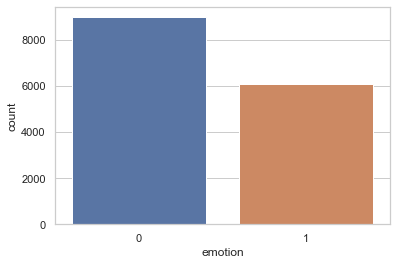

In [27]:
sns.countplot(df.emotion)
plt.show()

In [28]:
pixel_dim = math.sqrt(len(df.pixels[0].split(' ')))

print("The pixel dimension of the image =", pixel_dim)

The pixel dimension of the image = 48.0


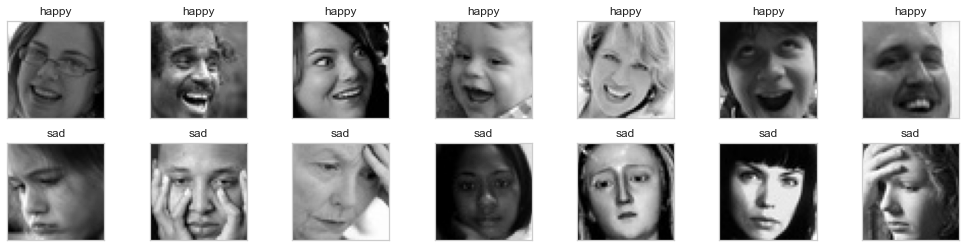

In [29]:
fig = plt.figure(1, (14, 12))

emotion_label_to_text = {0:'happy', 1:'sad'}

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

## Upsampling the data

In [30]:
df_maj = df[(df.emotion == 0)] 

In [31]:
df_min = df[(df.emotion == 1)] 

In [32]:
df_min_upsampled = resample(df_min, replace=True, n_samples=len(df_maj), random_state=42)

In [33]:
df_new = pd.concat([df_min_upsampled, df_maj])

In [34]:
df_new.index = pd.RangeIndex(start=0, stop=len(df_new.index), step=1)

## Analyzing the upsampled data

In [35]:
df_new.head()

,emotion,pixels
0,1,204 206 200 104 71 77 112 170 193 204 218 223 ...
1,1,19 21 27 28 33 29 41 37 24 31 42 45 48 62 63 7...
2,1,223 245 233 243 243 243 244 244 248 245 218 21...
3,1,119 30 120 166 119 101 108 91 51 58 68 82 100 ...
4,1,76 93 103 96 99 103 103 120 134 138 149 150 14...


In [36]:
print('Total no. of samples of Upsampled data =', df_new.shape[0])
print('Total no. of features of Upsampled data =', df_new.shape[1])
print('Total no. of elements of Sample data =', df_new.size)

Total no. of samples of Upsampled data = 17978
Total no. of features of Upsampled data = 2
Total no. of elements of Sample data = 35956


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17978 entries, 0 to 17977
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  17978 non-null  int64 
 1   pixels   17978 non-null  object
dtypes: int64(1), object(1)
memory usage: 281.0+ KB


In [38]:
df_new.emotion.value_counts()

1    8989
0    8989
Name: emotion, dtype: int64

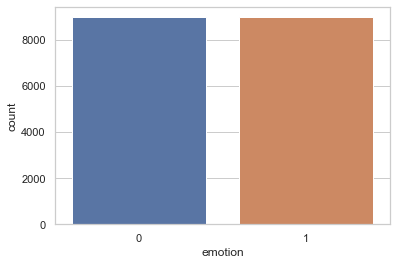

In [39]:
sns.countplot(df_new.emotion)
plt.show()

## Saving the new data

In [40]:
df_new.to_csv('data/fer_data/meta_data/fer.csv', index=False)

`Created a new fer data with raw pixel values`